# Homework 5
## Rafael Barrera Quiroz C.C. 1035433047

##Use scikit-learn to perform digit classification using data from Homework 2 (mnist_test.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('mnist_test.csv')

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Se seleccionarán una parejas de números que en el proceso de clasificación que puedan generan confuciones, tales como $5$ y $7$

In [4]:
df_1=df[(df['label'] == 5)|(df['label'] == 7)]

In [5]:
df_1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9982,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9988,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9990,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_1_np=df_1.to_numpy()
X_data=df_1_np[:,1:]
y_data=df_1_np[:,0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [8]:
logistic_regression=LogisticRegression(max_iter=200)
logistic_regression.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [9]:
print(X_data.shape)
print(X_train.shape)
print(X_test.shape)

(1920, 784)
(1536, 784)
(384, 784)


In [10]:
print(f'Accuracy of Logistic regression classifier on training set: {logistic_regression.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logistic_regression.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99


In [11]:
predict=logistic_regression.predict(X_test)

###Verifiquemos si los valores predichos por el modelo, construido en base en la regresión logistica, coinciden con los valores de testeo

In [12]:
(predict==y_test).all()

False

In [13]:
position=np.where(~(predict==y_test))
print(position[0])

[154 168 334]


In [14]:
X_data_selected=X_test[position]
lista=[]
for i in range(len(X_data_selected)):
  x=np.reshape(X_data_selected[i],(28,28))
  lista.append(x)
lista=np.array(lista)
print(lista.shape)

(3, 28, 28)


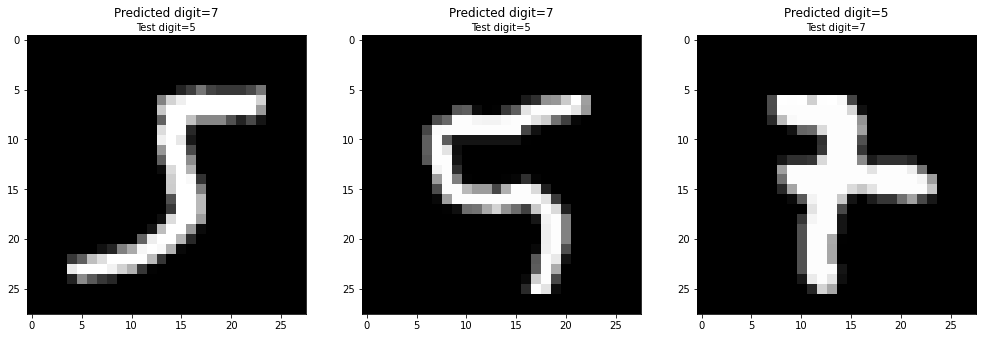

In [15]:
fig, ax = plt.subplots(1,lista.shape[0],figsize=(17,17))

for i in range(lista.shape[0]):
  img=lista[i]
  ax[i].xaxis.set_label_position('top')
  ax[i].set_xlabel('Test digit='+str(y_test[position[0][i]]))
  ax[i].set_title('Predicted digit='+str(predict[position[0][i]]))
  plt.gray()
  ax[i].imshow(img)

### Sleccionemos 10 números arbitrarios y vemos la igualdad entre el valor de testeo y el predicho por el modelo

In [16]:
random_numbers=np.random.randint(0,predict.shape[0],10)

In [17]:
for i in random_numbers:
  print('test value',y_test[i],', predicted value',predict[i],', equal=',y_test[i]==predict[i])

test value 5 , predicted value 5 , equal= True
test value 5 , predicted value 5 , equal= True
test value 7 , predicted value 7 , equal= True
test value 5 , predicted value 5 , equal= True
test value 7 , predicted value 7 , equal= True
test value 7 , predicted value 7 , equal= True
test value 5 , predicted value 5 , equal= True
test value 7 , predicted value 7 , equal= True
test value 7 , predicted value 7 , equal= True
test value 7 , predicted value 7 , equal= True


###Cálculo de la probabilidad asociada a cada valor de testeo tomado arbitrariamente

In [18]:
for i in random_numbers:
  p_five, p_seven = logistic_regression.predict_proba([X_test[i]])[0] 
  print(f'Test value: {y_test[i]}', f', p_five: {p_five}', f', p_seven: {p_seven}')

Test value: 5 , p_five: 0.9999978652097501 , p_seven: 2.1347902498807906e-06
Test value: 5 , p_five: 1.0 , p_seven: 2.3819588980517397e-18
Test value: 7 , p_five: 1.1220417928115012e-09 , p_seven: 0.9999999988779582
Test value: 5 , p_five: 1.0 , p_seven: 3.51525615555572e-25
Test value: 7 , p_five: 1.0658141036401503e-14 , p_seven: 0.9999999999999893
Test value: 7 , p_five: 3.0119196026134887e-10 , p_seven: 0.999999999698808
Test value: 5 , p_five: 1.0 , p_seven: 2.3206087078993476e-22
Test value: 7 , p_five: 0.0 , p_seven: 1.0
Test value: 7 , p_five: 1.0020873020266663e-12 , p_seven: 0.9999999999989979
Test value: 7 , p_five: 1.0162803931734743e-10 , p_seven: 0.999999999898372


### Se seleccionarán los siguientes números y se evalurá la calidad de las predicciones en base al modelo de regresión logistica $0$, $8$

In [19]:
df_3=df[(df['label'] == 0)|(df['label'] == 8)]

In [20]:
df_3

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9967,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9991,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_3_np=df_3.to_numpy()
X_data=df_3_np[:,1:]
y_data=df_3_np[:,0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [23]:
logistic_regression=LogisticRegression(max_iter=500)
logistic_regression.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [24]:
print(X_data.shape)
print(X_train.shape)
print(X_test.shape)

(1954, 784)
(1367, 784)
(587, 784)


In [25]:
print(f'Accuracy of Logistic regression classifier on training set: {logistic_regression.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logistic_regression.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99


In [26]:
predict=logistic_regression.predict(X_test)

In [27]:
(predict==y_test).all()

False

In [28]:
position=np.where(~(predict==y_test))
print(position[0])

[ 19  39 208 216 272 534]


In [29]:
X_data_selected=X_test[position]
lista=[]
for i in range(len(X_data_selected)):
  x=np.reshape(X_data_selected[i],(28,28))
  lista.append(x)
lista=np.array(lista)
print(lista.shape)

(6, 28, 28)


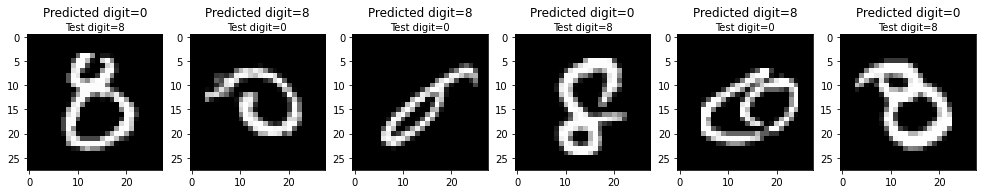

In [33]:
fig, ax = plt.subplots(1,lista.shape[0],figsize=(17,17))

for i in range(lista.shape[0]):
  img=lista[i]
  ax[i].xaxis.set_label_position('top')
  ax[i].set_xlabel('Test digit='+str(y_test[position[0][i]]))
  ax[i].set_title('Predicted digit='+str(predict[position[0][i]]))
  plt.gray()
  ax[i].imshow(img)

### Sleccionemos 10 números arbitrarios y vemos la igualdad entre el valor de testeo y el predicho por el modelo

In [31]:
random_numbers=np.random.randint(0,predict.shape[0],10)
for i in random_numbers:
  print('test value',y_test[i],', predicted value',predict[i],', equal=',y_test[i]==predict[i])

test value 0 , predicted value 0 , equal= True
test value 0 , predicted value 0 , equal= True
test value 0 , predicted value 0 , equal= True
test value 8 , predicted value 8 , equal= True
test value 8 , predicted value 8 , equal= True
test value 0 , predicted value 0 , equal= True
test value 8 , predicted value 8 , equal= True
test value 0 , predicted value 0 , equal= True
test value 0 , predicted value 0 , equal= True
test value 8 , predicted value 8 , equal= True


###Cálculo de la probabilidad asociada a cada valor de testeo tomado arbitrariamente

In [32]:
for i in random_numbers:
  p_five, p_seven = logistic_regression.predict_proba([X_test[i]])[0] 
  print(f'Test value: {y_test[i]}', f', p_zero: {p_five}', f', p_eight: {p_seven}')

Test value: 0 , p_zero: 0.999999999724009 , p_eight: 2.7599100920327747e-10
Test value: 0 , p_zero: 0.9999999999956929 , p_eight: 4.307086567226511e-12
Test value: 0 , p_zero: 0.9999999937014351 , p_eight: 6.298564924707557e-09
Test value: 8 , p_zero: 4.440892098500626e-16 , p_eight: 0.9999999999999996
Test value: 8 , p_zero: 8.722263022953314e-09 , p_eight: 0.999999991277737
Test value: 0 , p_zero: 0.9999999033270818 , p_eight: 9.667291826195611e-08
Test value: 8 , p_zero: 0.0 , p_eight: 1.0
Test value: 0 , p_zero: 1.0 , p_eight: 6.559509050413271e-23
Test value: 0 , p_zero: 0.999999999999898 , p_eight: 1.0207092552757051e-13
Test value: 8 , p_zero: 3.817235416647691e-11 , p_eight: 0.9999999999618276
